In [1]:
pip install plotly_express

   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/233.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------- ----------- 163.8/233.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB 8.9 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.6 MB 11.0 MB/s eta 0:00:02
   ----- ---------------------------------- 2.2/15.6 MB 15.6 MB/s eta 0:00:01
   ----------- ---------------------------- 4.7/15.6 MB 25.0 MB/s eta 0:00:01
   --------------- ------------------------ 6.2/15.6 MB 30.7 MB/s eta 0:00:01
   --------------- ------------------------ 6.2/15.6 MB 30.7 MB/s eta 0:00:01
   ---------------- ----------------------- 6.3/15.6 MB 21.3 MB/s eta 0:00:01
   ----------------- ---------------------- 6.7/15.6 MB 17.8 MB/s eta 0:00

In [3]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'

titanic = pd.read_excel(titanic_url)
titanic.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

<Axes: ylabel='count'>

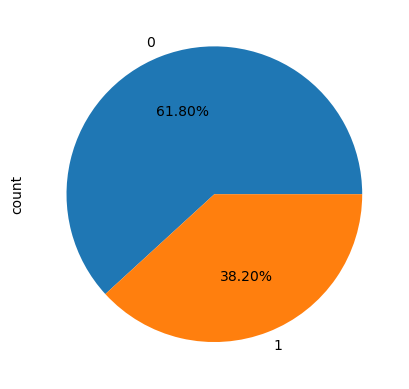

In [11]:
titanic['survived'].value_counts().plot.pie(autopct='%1.2f%%')

<Axes: ylabel='count'>

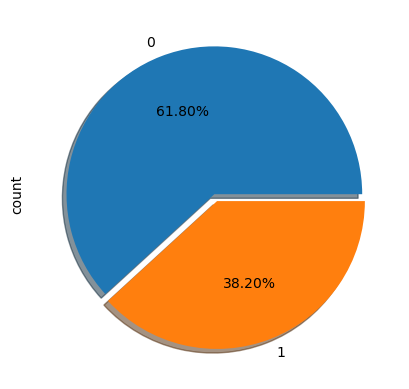

In [13]:
titanic['survived'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, explode=[0, 0.05])

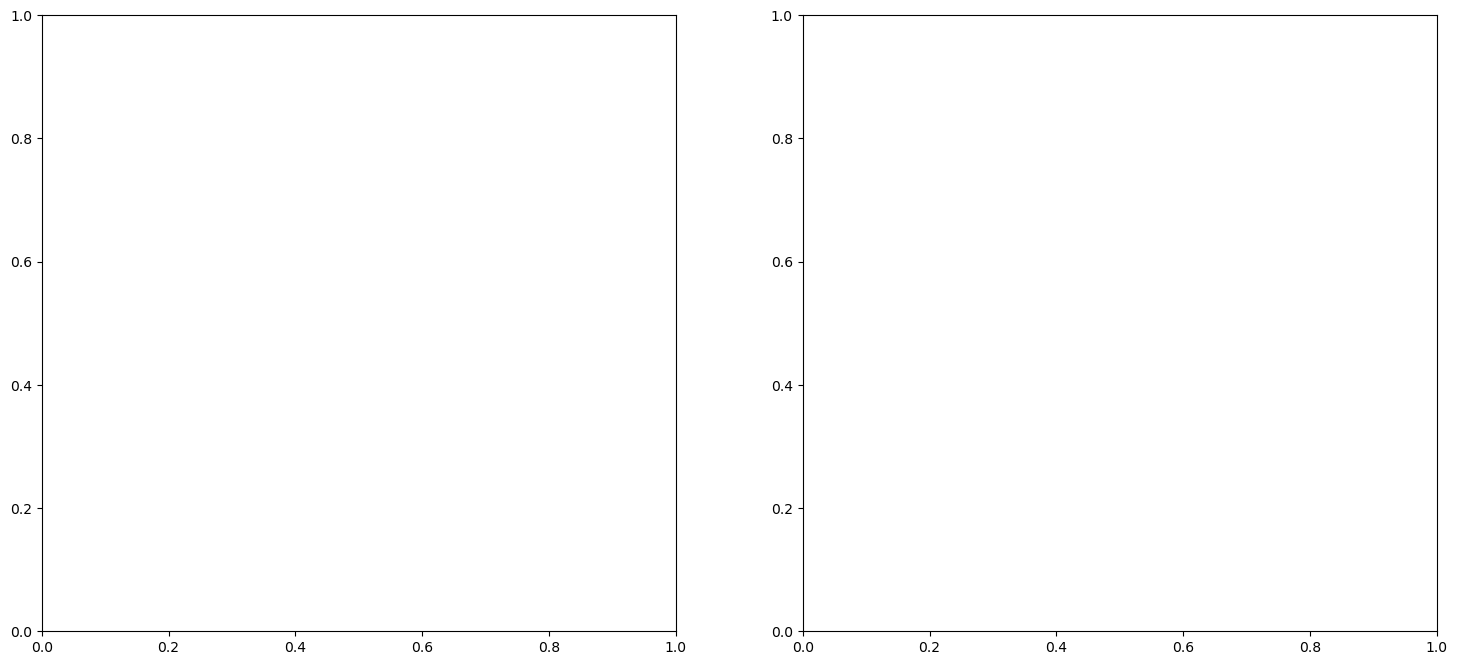

In [20]:
f, ax = plt.subplots(1,2, figsize=(18,8)) # 1행 2열의 그래프를 만들고, 전체 그래프의 크기를 가로 18인치, 세로 8인치로 설정

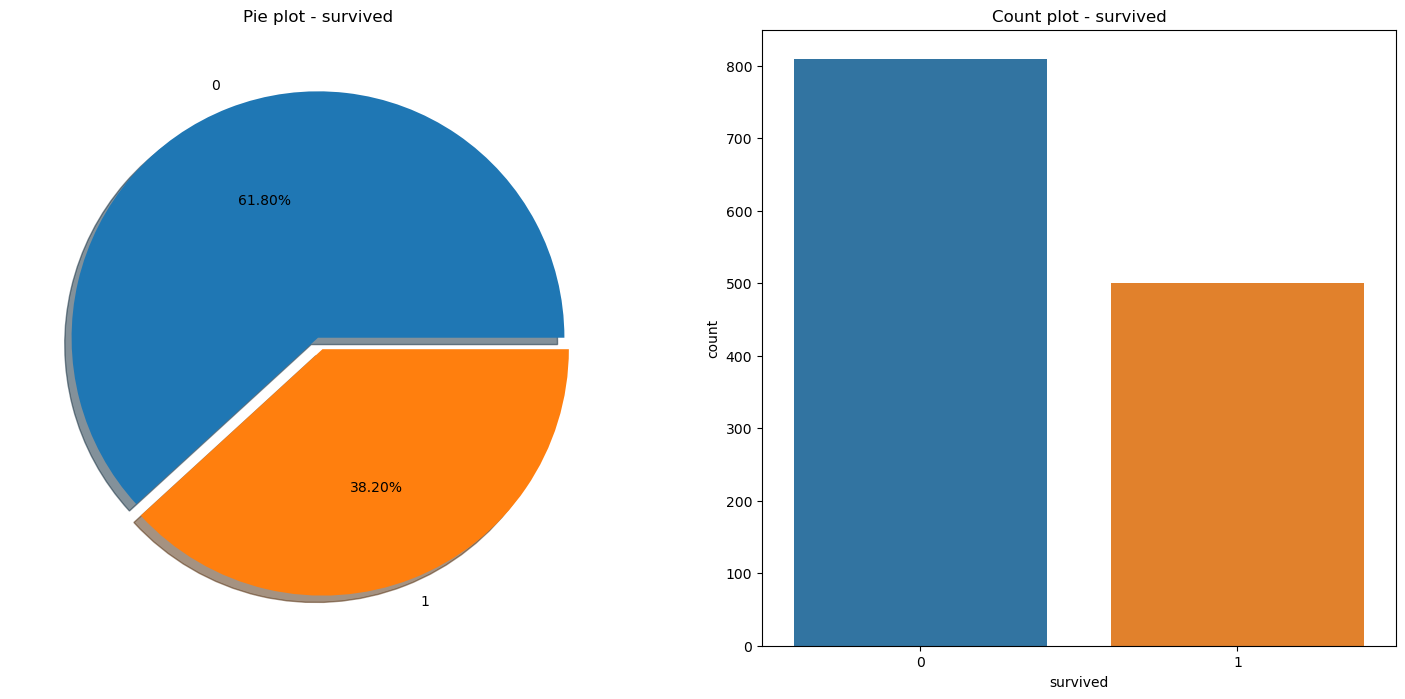

In [28]:
f, ax = plt.subplots(1,2, figsize=(18,8)) # 1행 2열의 그래프를 만들고, 전체 그래프의 크기를 가로 18인치, 세로 8인치로 설정

titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.2f%%', shadow=True, explode=[0, 0.05])
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

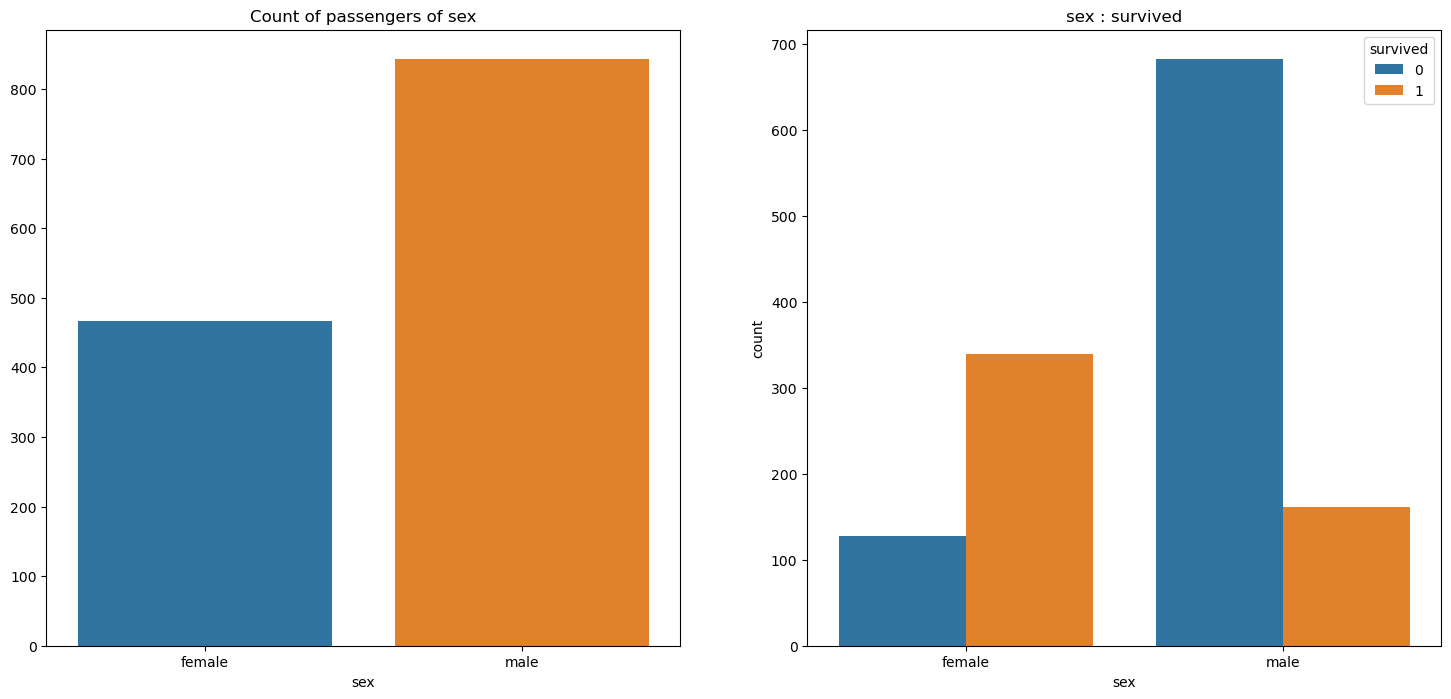

In [31]:
# 성별에 따른 생존 현황


f, ax = plt.subplots(1,2, figsize=(18,8)) # 1행 2열의 그래프를 만들고, 전체 그래프의 크기를 가로 18인치, 세로 8인치로 설정

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of passengers of sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, hue='survived' ,ax=ax[1])
ax[1].set_title('sex : survived')

plt.show()

In [32]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


c:\Users\kimsh-dt01\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


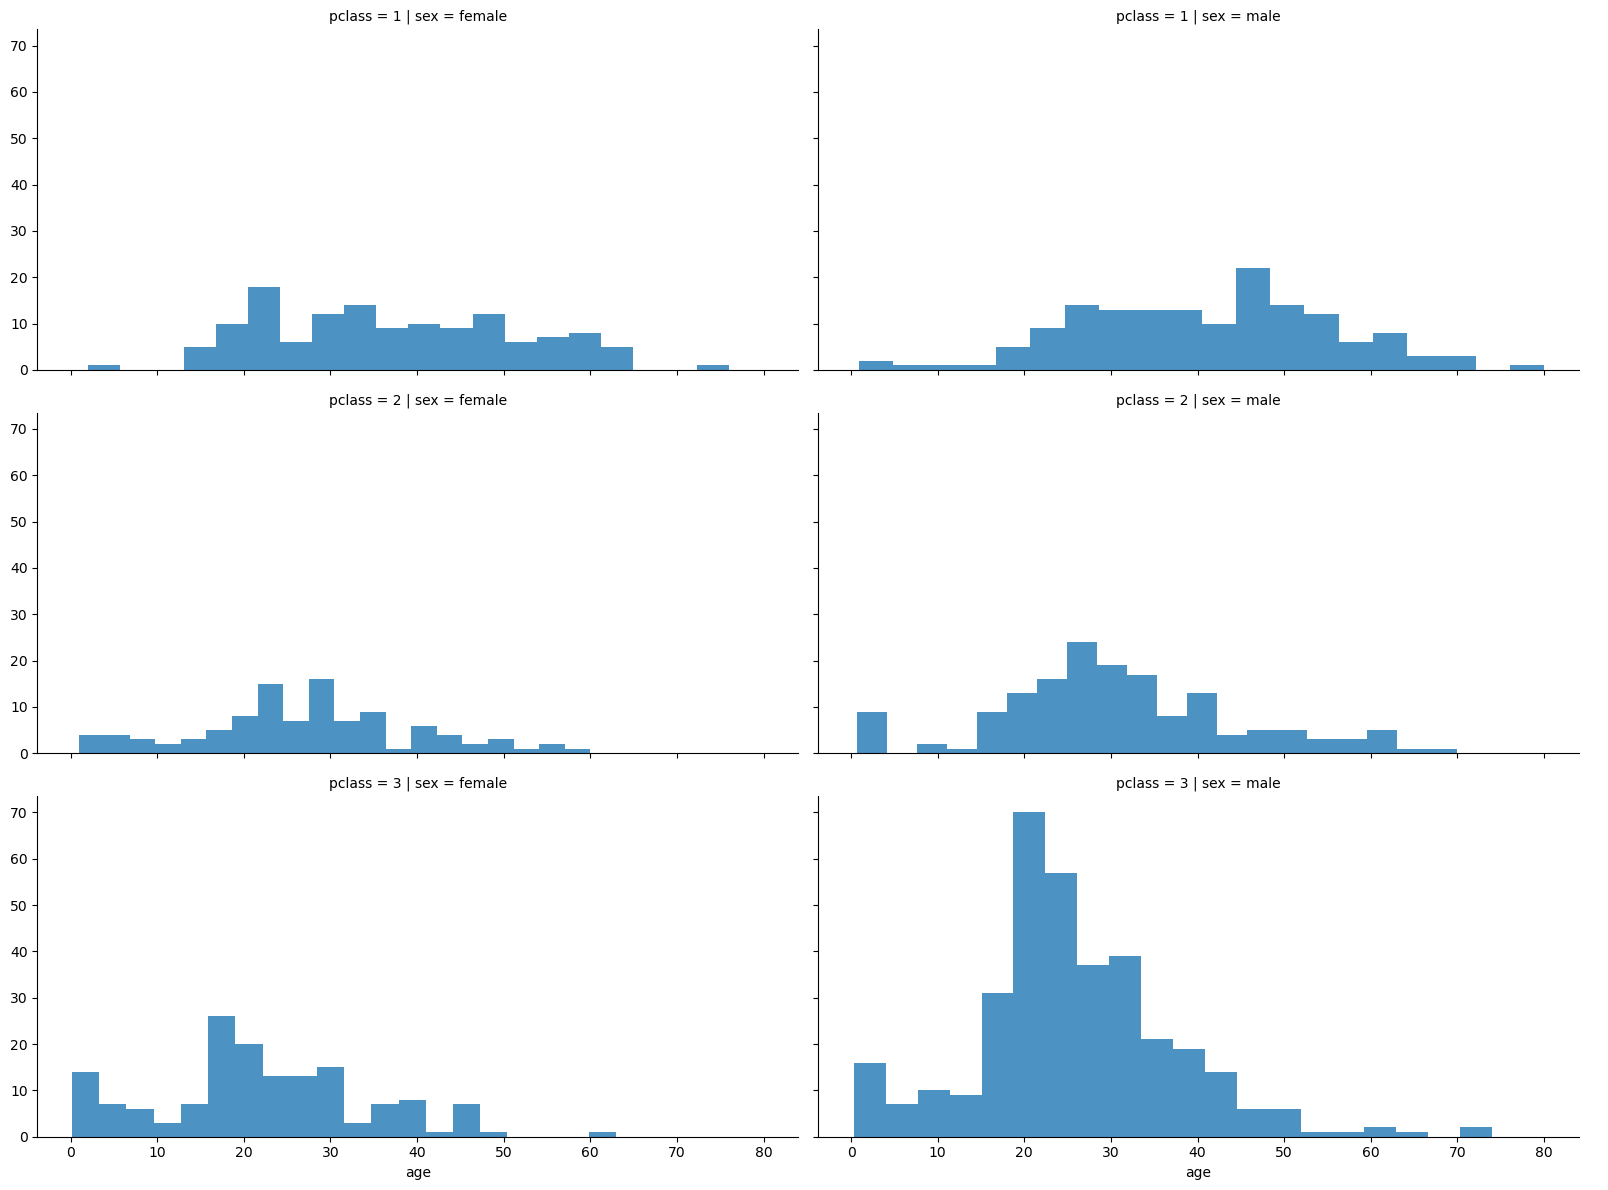

In [35]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend()


In [36]:
import plotly_express as px



In [38]:
fig = px.histogram(titanic, x='age')
fig.show()

c:\Users\kimsh-dt01\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



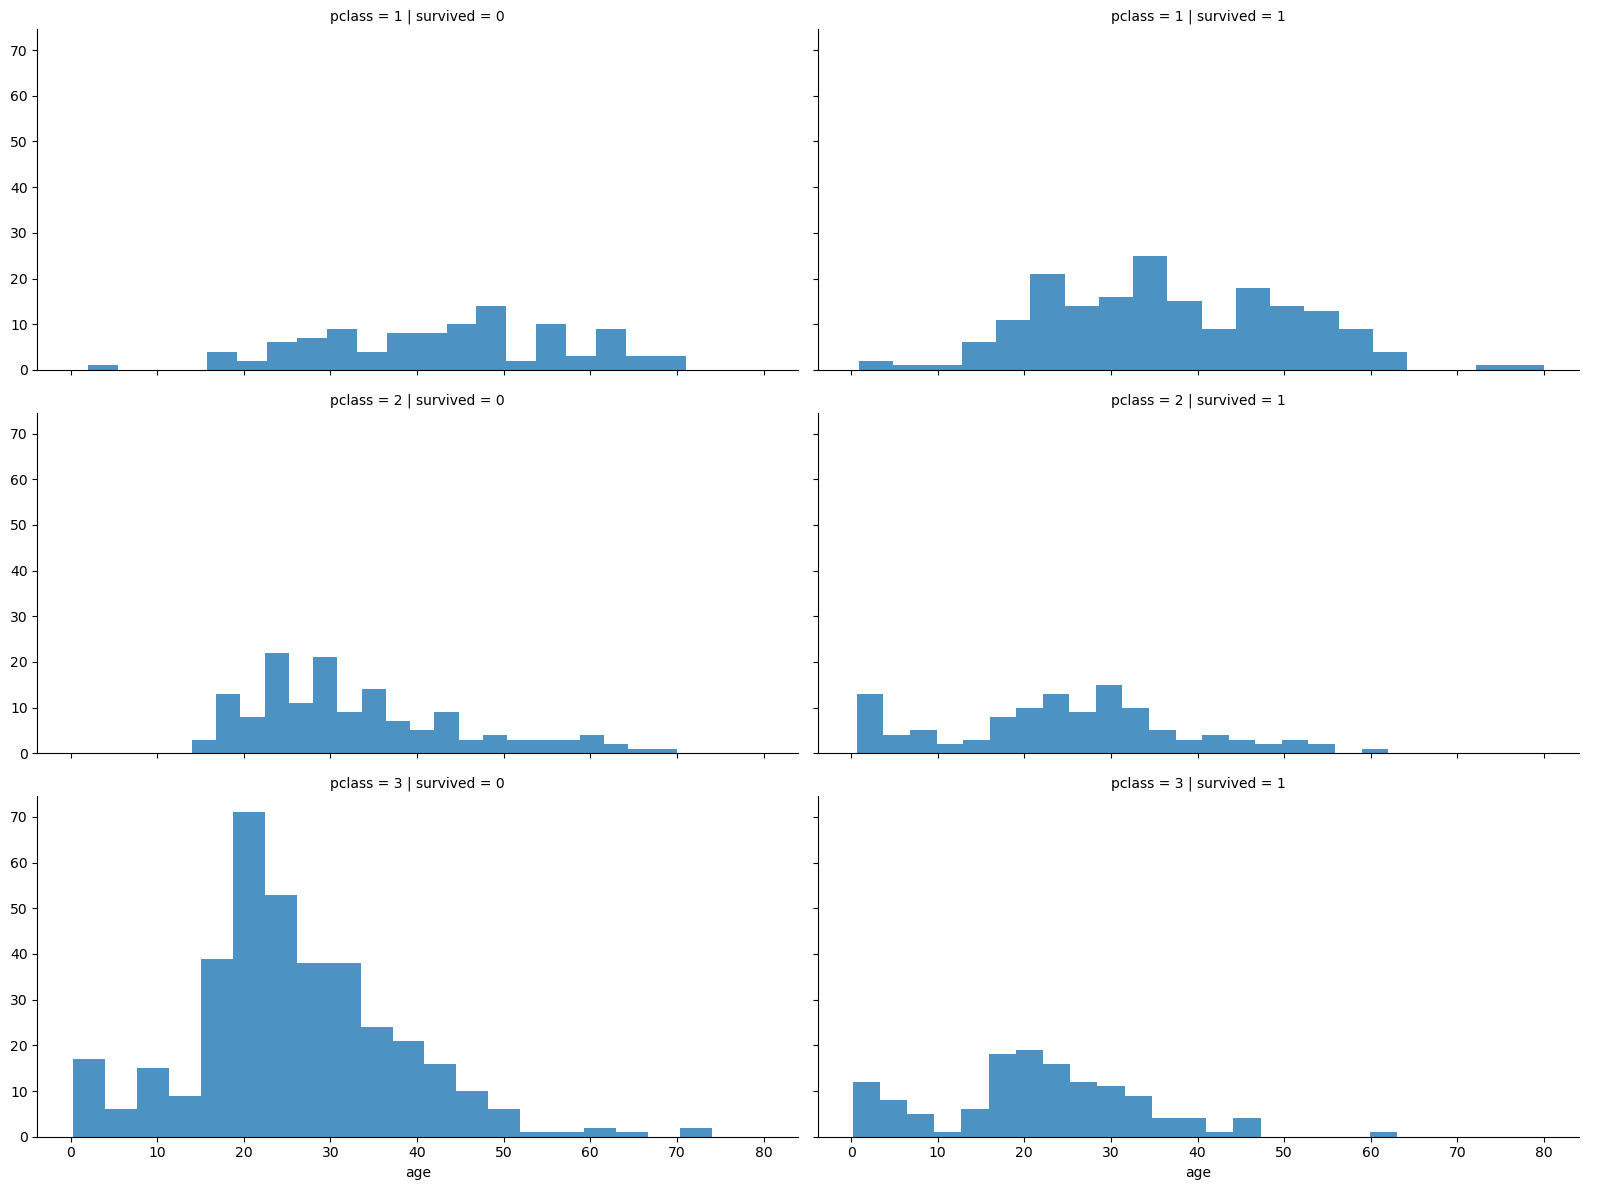

In [39]:
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend()

In [42]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0,7, 15,30,60,100] ,
       include_lowest=True,
       labels=['baby', 'teenage', 'young', 'adult', 'old'])

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


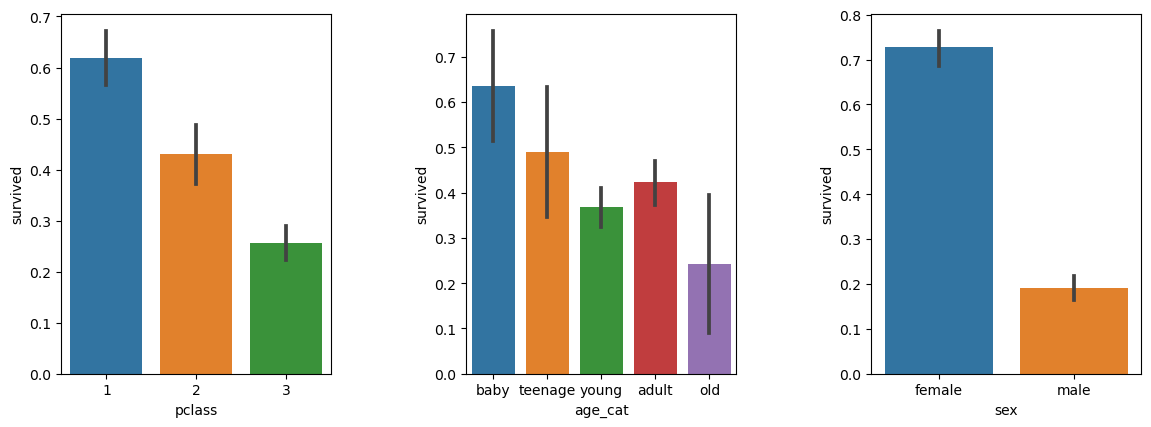

In [47]:
plt.figure(figsize=(12,4))

plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=titanic)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

plt.show()